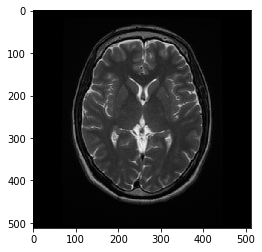

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/brain_MR.jpg")

img_cp = np.copy(img)

img_cp = cv2.cvtColor(img_cp, cv2.COLOR_BGR2RGB)

plt.imshow(img_cp);

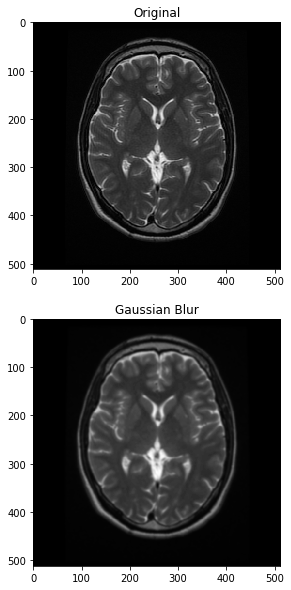

In [24]:
gray = cv2.cvtColor(img_cp, cv2.COLOR_RGB2GRAY)

gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

ax1.set_title("Original")
ax1.imshow(img_cp, cmap="gray")

ax2.set_title("Gaussian Blur")
ax2.imshow(gray_blur, cmap="gray")

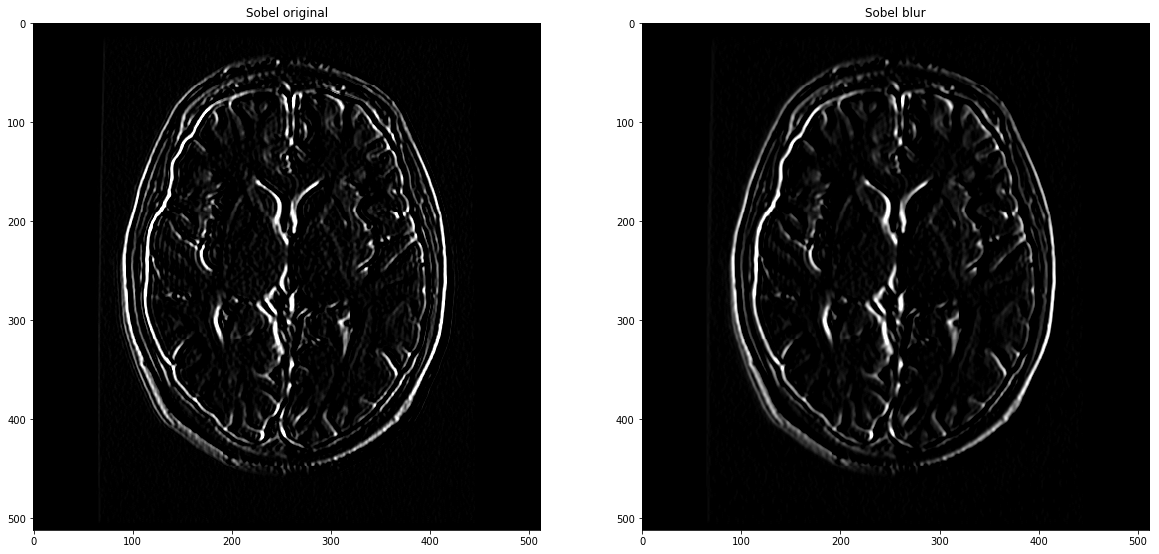

In [23]:

sobel_x = np.array([[-2, 0, 2],
                   [-1, 0, 1],
                   [-2, 0, 2]])

filtered = cv2.filter2D(gray, -1, sobel_x)
filtered_blur = cv2.filter2D(gray_blur, -1, sobel_x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.set_title("Sobel original")
ax1.imshow(filtered, cmap="gray")

ax2.set_title("Sobel blur")
ax2.imshow(filtered_blur, cmap="gray")

## Test oerfirnabce with high-pass filter

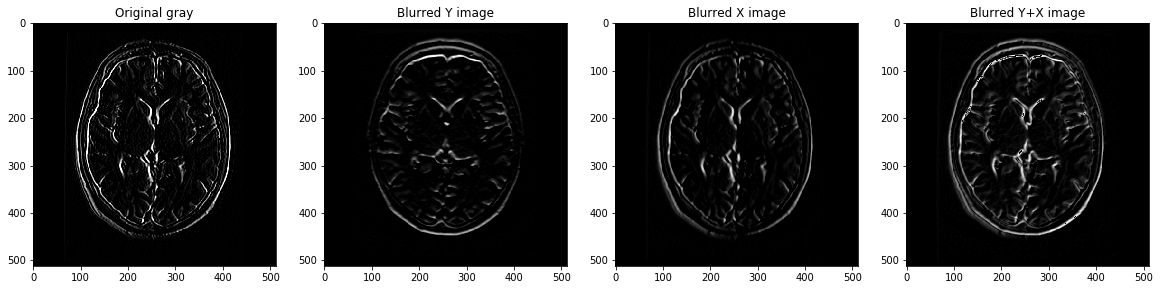

In [27]:
# High-pass filter with 3x3 sobel

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Filter the original and blurred image

new_filtered = cv2.filter2D(gray, -1, sobel_x)
y_filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
x_filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_x)
c_filtered_blurred = y_filtered_blurred + x_filtered_blurred


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))

ax1.set_title("Original gray")
ax1.imshow(new_filtered, cmap="gray")

ax2.set_title("Blurred Y image")
ax2.imshow(y_filtered_blurred, cmap="gray")

ax3.set_title("Blurred X image")
ax3.imshow(x_filtered_blurred, cmap="gray")

ax4.set_title("Blurred Y+X image")
ax4.imshow(c_filtered_blurred, cmap="gray")

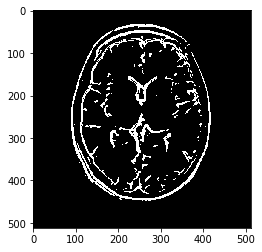

In [32]:
# Threshold image edges

_, thresh = cv2.threshold(c_filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap="gray")